데이터 URL:

- https://www.kaggle.com/datasets/mexwell/drug-consumption-classification/data?select=drug_consumption.csv

설명 :

- 1885명의 응답자 포함
- 각 응답자 별 12가지 feature
- NEO-FFI-R(신경증, 외향성, 경험에 대한 개방성, 친화성 및 성실성), BIS-11(충동성), ImpSS(감각 탐구)와 같은 성격 측정값
- 교육수준, 연령, 성별, 거주 국가 및 민족 데이터
- 원 데이터가 범주형이었지만, kaggle에 업로드되어 있는 데이터는 quantification되어 있음.

- 각 참가자들은 18가지 합법적 및 불법적 약물 사용에 대한 질문을 받았음.
- 허구 약물도 포함되어 있고, 이는 과대 주장자를 식별하기 위해 도입되었다.

- 각 약물에 대해 아래 항목을 선택
1. 약물을 사용한적 없음
2. 지난 10년간 사용한적 없음
3. 지난 10년 사용함
4. 지난 해 사용함
5. 지난 달 사용함
6. 지난 주 사용함
7. 어제 사용함

In [232]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [233]:
# import dATA
drug_Q = pd.read_csv('data/drug_consumption.csv')
drug_Q.shape

(1885, 32)

In [234]:
drug_Q.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [235]:
drug_Q.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


- ID : id
- Age : 나이
- Gender : 성별
- Education : 교육 수준
- Country : 국가
- Ethnicity : 민족
- Nscore : 신경증 점수
- Escore : 외향성 점수
- Oscore : 경험에 대한 개방성 점수
- Ascore : 친화성 점수
- Cscore : 성실성 점수
- Impulsive : 충동성 점수
- SS : 감각 탐구 점수
- Alcohol, Amphet, Amy1, Benzos, Caff, Cannabis, Choc, Coke, Crack, Ecstasy, Heroin, Ketamine, Leglh, LSD, Meth, Mushrooms, Nicotine : 각 약물에 대한 사용 여부 및 빈도를 나타냄
- Semer : 허구 약물 사용 여부 및 빈도를 나타냄
- VSA : 휘발성 물질 남용 여부 및 빈도를 나타냄

In [236]:
# 전부 quantification되어 있기 때문에 하나하나 확인해보기.
drug_Q['Gender'].value_counts()

-0.48246    943
 0.48246    942
Name: Gender, dtype: int64

In [237]:
drug_Q['Education'].value_counts()

-0.61113    506
 0.45468    480
 1.16365    283
-0.05921    270
-1.22751    100
-1.73790     99
 1.98437     89
-1.43719     30
-2.43591     28
Name: Education, dtype: int64

In [238]:
drug_Q['Country'].value_counts()

 0.96082    1044
-0.57009     557
-0.28519     118
 0.24923      87
-0.09765      54
 0.21128      20
-0.46841       5
Name: Country, dtype: int64

In [239]:
drug_Q['Ethnicity'].value_counts()

-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
 0.12600      20
-0.22166      20
 1.90725       3
Name: Ethnicity, dtype: int64

In [240]:
drug_Q['Alcohol'].value_counts()

CL5    759
CL6    505
CL4    287
CL3    198
CL2     68
CL1     34
CL0     34
Name: Alcohol, dtype: int64

In [241]:
drug_Q['Semer'].value_counts()

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64

- 성별 : 남녀 943, 942로 반반의 비율을 이루고 있고 어떤 대상이 남자인지 여자인지는 알 수 없다.
- 교육 수준 : 9 수준으로 나뉘어져 있고, 각 값이 어느정도의 수준을 나타내는지는 알 수 없다.
- 국가 : 7개의 국가로 나뉘어져 있고, 어느 국가인지는 알 수 없다.
- 민족 : 7 민족으로 나뉘어져 있고, 어느 민족인지는 알 수 없다. 하나의 민족에 몰려있음을 확인
- 약물 빈도 : 앞서 설명한 7개의 수준으로 나뉘어져 있고,
  **허위 약물에서 CL0이 가장 높은 값을 가진걸 보면 값이 올라갈 수록 빈도가 드문것을 알 수 있다.**

In [242]:
# 분석에 필요없은 ID항 제거 후, Na 확인
X = drug_Q.drop(['ID'], axis=1)
X.isnull().sum().sum()

0

In [243]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


- Na값은 없는 것을 확인

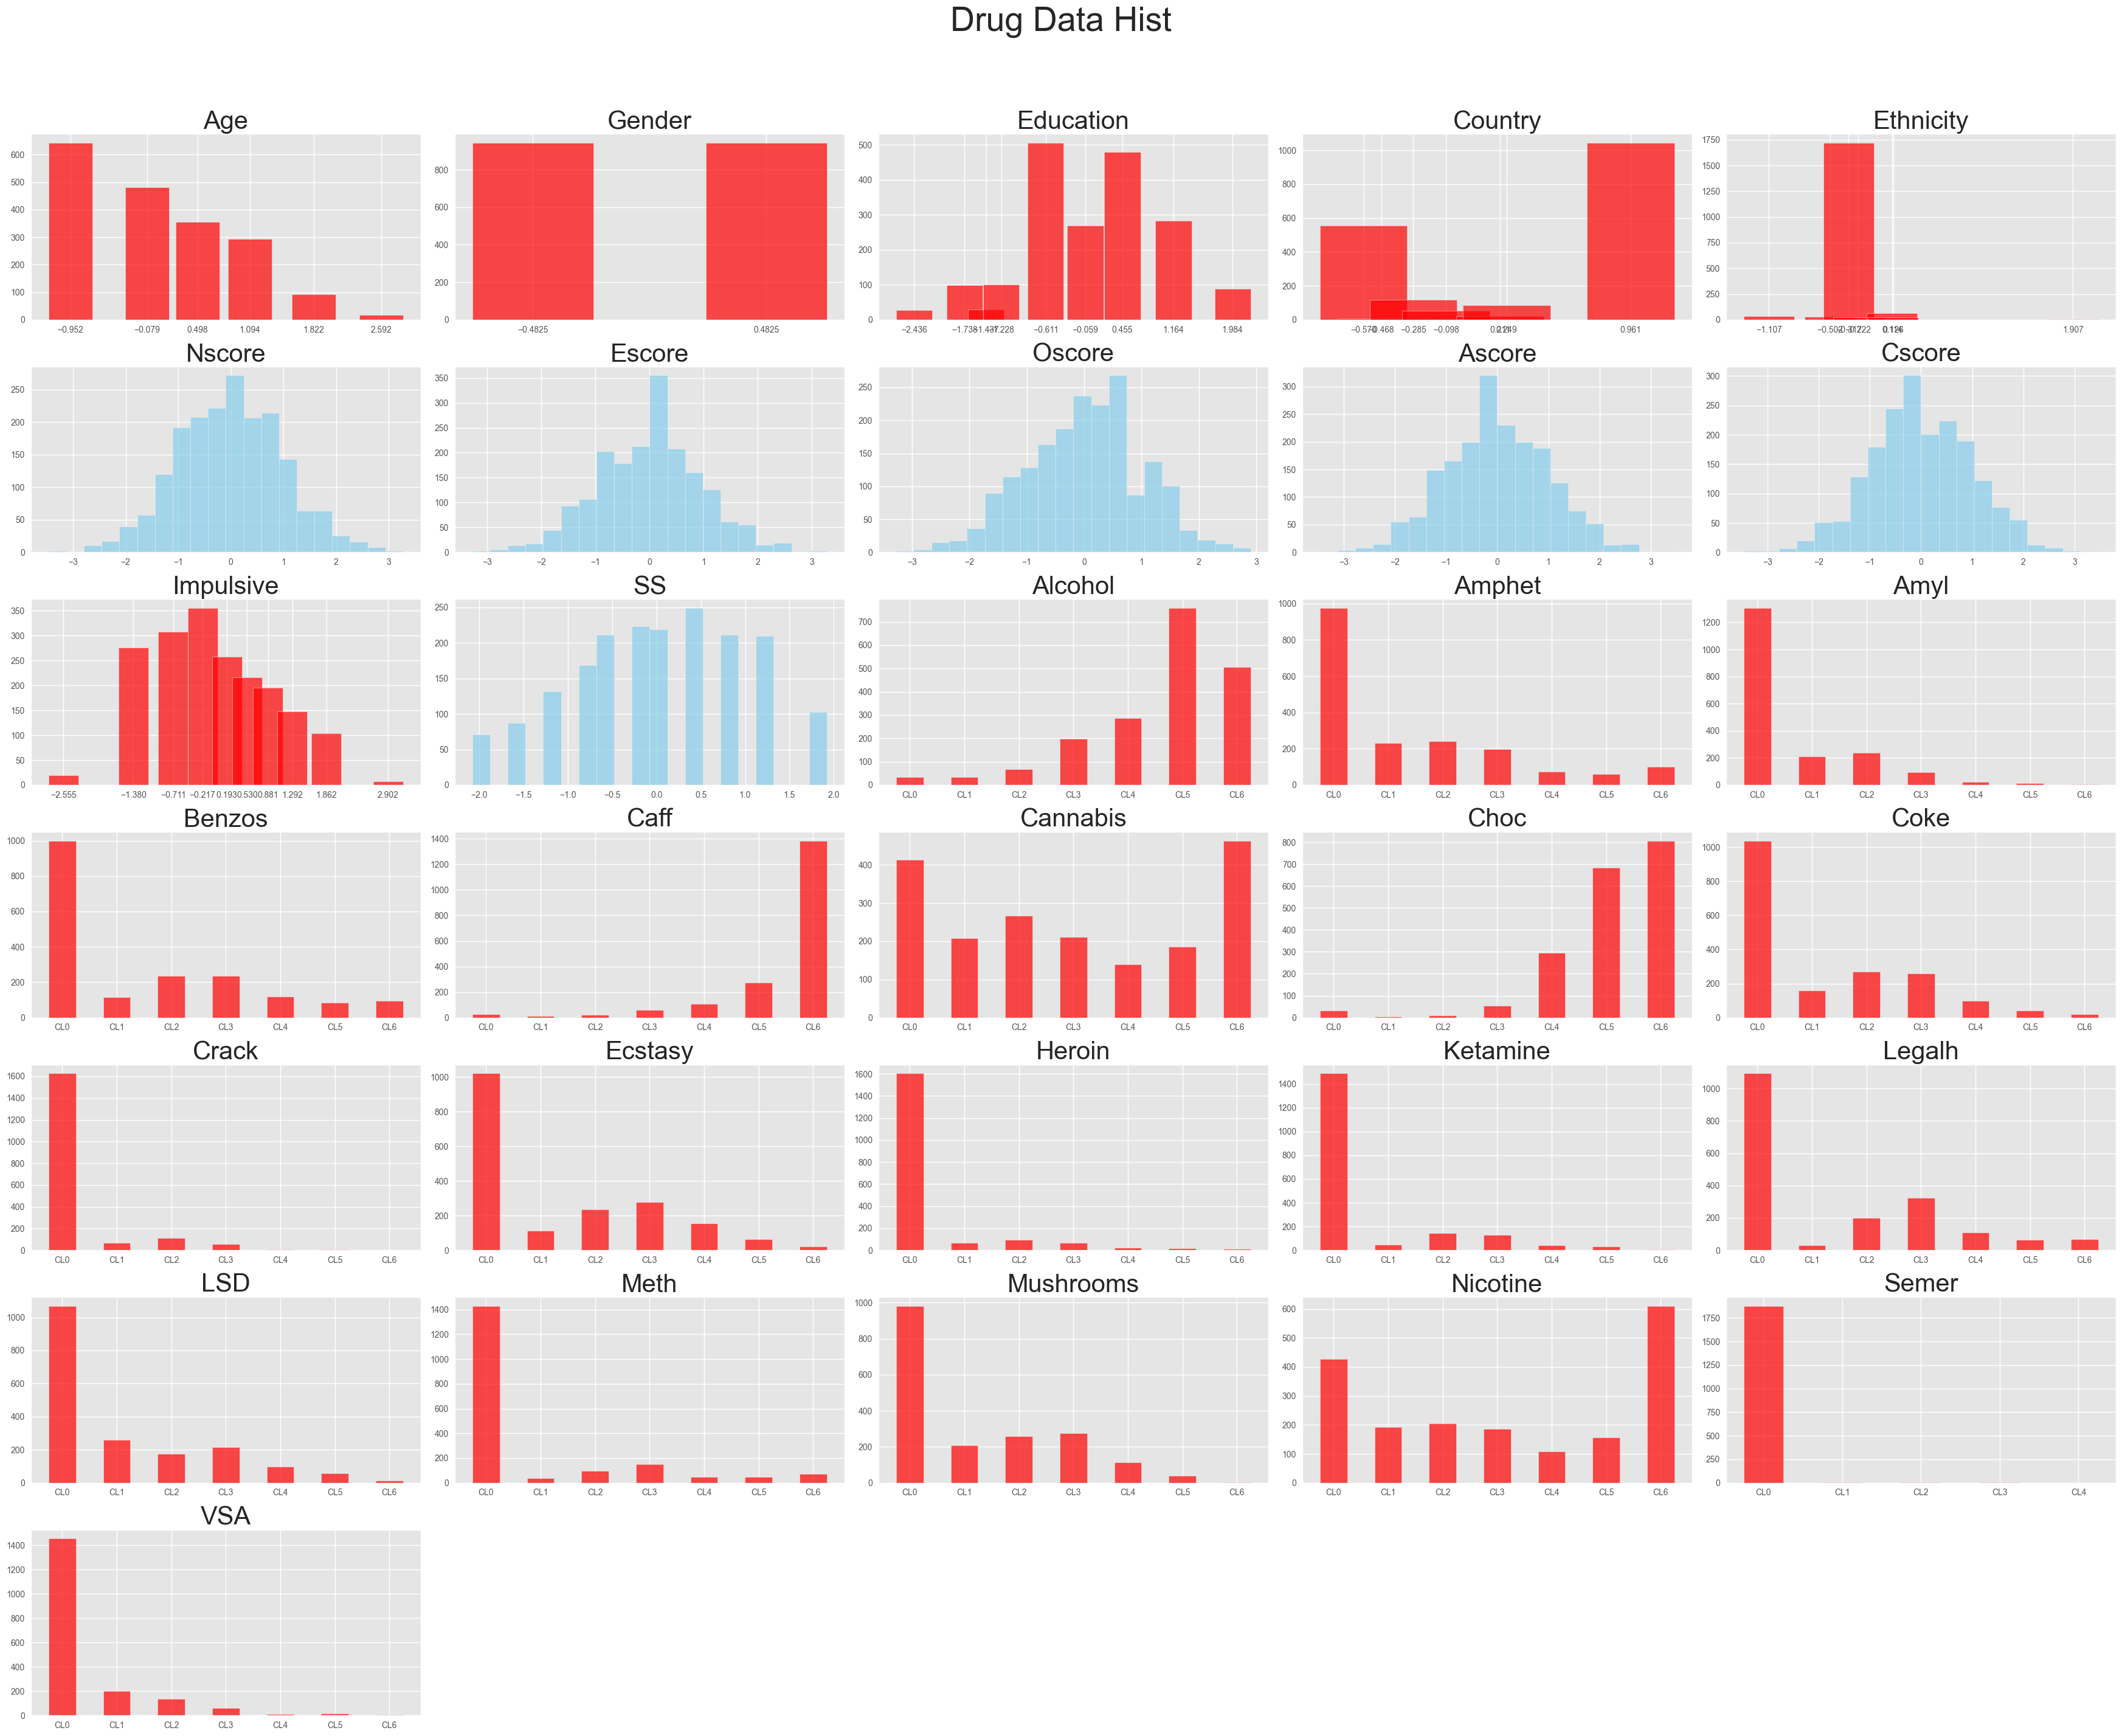

In [244]:
# 연령 정보 확인
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(35,30))
plt.suptitle("Drug Data Hist", fontsize = 40)

cols = X.columns
n_features = len(cols)

# subplot
for i in range(n_features):
    plt.subplot(7, 5, i+1)
    plt.title(cols[i], fontsize= 30)
    if len(X[cols[i]].unique()) > 10: # 교육 수준이 9범위로 그 이상은 히스트로
        plt.hist(X[cols[i]], bins=20, alpha = 0.7, color = 'skyblue')
    else: # 나머지는 범주형으로 이해하고 바플롯
        temp = X[cols[i]].value_counts().sort_index()
        plt.bar(temp.keys(), temp.values, width = 0.5, alpha = 0.7, color = 'red')
        plt.xticks(temp.keys())

plt.tight_layout(rect = [0, 0.03, 1, 0.95])
plt.show()

1. 국가, 민족의 경우 크게 치우쳐진 분포를 나타냄
2. NEO-FFI-R, BIS-11, ImpSS의 경우 거의 정규분포를 이룸
3. 약물에서(CL0을 약물 사용한적 없음으로 예상할 때) 대부분이 사용한적이 없지만, Alcohol, Caff, Cannabis, Choc, Nicotine이 약간 다른 추세를 나타냄

# 1. 범주형 인코딩

국가랑 민족이 치우쳐진 분포를 나타내긴 하지만 범주형 데이터이기에 추가적인 조작은 하지 않고.
현재 범주형 변수들(정도의 크기와 상관없는)이 모두 수치화 되어있기 때문에 이를 범주형으로 변경하고 원-핫인코딩 적용

- Age, Education : 아마 정도의 차이가 있어보이긴 하나, 어느 값이 어느정도인지는 본 데이터로 알 수없다.
- Gender, Country, Ethnicity : 정도의 차이가 없는 범주형 변수. 원핫 인코딩 적용

In [245]:
X['Gender'].unique()

array([ 0.48246, -0.48246])

In [246]:
X['Gender'] = np.where(X['Gender'] == 0.48246, 'Gen1', 'Gen2')

In [247]:
X['Country'].unique()

array([ 0.96082,  0.24923, -0.57009, -0.28519, -0.09765,  0.21128,
       -0.46841])

In [248]:
conditions_country = [(X['Country'] == val) for val in X['Country'].unique()]
choices_country = ['Country' + str(i+1) for i in range(len(X['Country'].unique()))]
X['Country'] = np.select(conditions_country, choices_country)

In [249]:
X['Ethnicity'].unique()

array([ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702,
        1.90725])

In [250]:
conditions_eth = [(X['Ethnicity'] == val) for val in X['Ethnicity'].unique()]
choices_eth = ['Ethnicity' + str(i+1) for i in range(len(X['Ethnicity'].unique()))]
X['Ethnicity'] = np.select(conditions_eth, choices_eth)

In [251]:
print(X['Gender'].value_counts(),
      X['Ethnicity'].value_counts(),
      X['Country'].value_counts())

Gen2    943
Gen1    942
Name: Gender, dtype: int64 Ethnicity2    1720
Ethnicity3      63
Ethnicity6      33
Ethnicity5      26
Ethnicity1      20
Ethnicity4      20
Ethnicity7       3
Name: Ethnicity, dtype: int64 Country1    1044
Country3     557
Country4     118
Country2      87
Country5      54
Country6      20
Country7       5
Name: Country, dtype: int64


# 2. Target은 뭘로 할 것인가?
매우 애매한 부분이다. 중독이다 아니다로 나오는 것도 아니고 단순히 drug를 consumption한 빈도가 있으니 어떻게 처리해야할지 애매한 부분

약물 종류도 많다.

- 하나의 접근 방법으로 모든 약물(허위 약물 제외)을 점수화(CL0 = 0, ..., CL6 = 6)한다. CL6으로 갈 수록 더 자주 섬취하는 것이기 때문
- 약물에 위험도 가중치를 부여하고 합산한 다음, 각 개인 별로 평균을 낸다.
- 이 가중평균 값을 target으로 회귀를 진행한다.

**평균값을 세가지 그룹으로 나누는 것은 임의적인 방법이라. 추가 적인 대안이 필요하다.**

In [252]:
X.iloc[:,12:29].columns

Index(['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
       'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine'],
      dtype='object')

미국의 약물 법률에서 Controlled Substances Act(CSA)에 따라 통제 등급을 확인 후, 스케쥴에 따라 분리하여 가중치를 적용
스케쥴의 숫자가 낮을 수록 위험도가 높게 분류됨.
1. 스케쥴1 : LSD, Heroin, Cannabis(주와 연방 법간에 차이가 있을 수 있음), Ecstasy, Mushrooms
2. 스케쥴2 : Coke, Meth, Amphet, Crack
3. 스케쥴3 : Ketamine
4. 스케쥴4 : Benzos
6. 통제되지 않음 : Caff, Niocotine, Alcohol

Choc, Legalh, Amyl, VSA은 분류가 어렵거나 정확히 어떤 약물인지 모르겠어서 분석에서 제외.
Semer 또한 가짜 약물이므로 제외

In [253]:
X = X.drop(['Choc', 'Legalh', 'Amyl', 'Semer', 'VSA'], axis=1)
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,LSD,Meth,Mushrooms,Nicotine
0,0.49788,Gen1,-0.05921,Country1,Ethnicity1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2
1,-0.07854,Gen2,1.98437,Country1,Ethnicity2,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL3,CL0,CL4,CL0,CL2,CL2,CL3,CL0,CL4
2,0.49788,Gen2,-0.05921,Country1,Ethnicity2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
3,-0.95197,Gen1,1.16365,Country1,Ethnicity2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL2
4,0.49788,Gen1,1.98437,Country1,Ethnicity2,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL3,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL2,CL2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,Gen1,-0.61113,Country3,Ethnicity2,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL5,CL0,CL0,CL0,CL0,CL0,CL3,CL0,CL0,CL0
1881,-0.95197,Gen2,-0.61113,Country3,Ethnicity2,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL3,CL0,CL0,CL2,CL0,CL0,CL5,CL4,CL4,CL5
1882,-0.07854,Gen1,0.45468,Country3,Ethnicity2,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL6,CL4,CL0,CL4,CL0,CL2,CL2,CL0,CL2,CL6
1883,-0.95197,Gen1,-0.61113,Country3,Ethnicity2,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL6,CL0,CL0,CL3,CL0,CL0,CL3,CL0,CL3,CL4


- CL0을 0으로, CL6을 6으로 변환

In [254]:
# 변환을 위한 딕셔너리 생성
class_mapping = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

drug_feature = X.iloc[:,12:26].columns

# 데이터프레임의 모든 열에 매핑 적용
for column in drug_feature:
        X[column] = X[column].replace(class_mapping)


- 스케쥴에 따라 가중치 부여

In [255]:
weights = {
    'LSD': 5,
    'Heroin': 5,
    'Cannabis': 5, 
    'Ecstasy': 5,
    'Mushrooms': 5,
    'Coke': 4,
    'Meth': 4,
    'Amphet': 4,
    'Crack': 4,
    'Ketamine': 3,
    'Benzos': 2,
    'Caff': 1,
    'Nicotine': 1,
    'Alcohol': 1
}

for drug, weight in weights.items():
    X[drug + '_weighted'] = X[drug] * weight

weighted_columns = [drug + '_weighted' for drug in weights]
X['Weighted_Average'] = X[weighted_columns].sum(axis=1)/sum(weights.values())

In [256]:
# 나머지 항 제거
X.drop(weighted_columns, axis=1, inplace=True)

In [257]:
X.drop(drug_feature, axis=1, inplace=True)

In [258]:
X

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Weighted_Average
0,0.49788,Gen1,-0.05921,Country1,Ethnicity1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.510204
1,-0.07854,Gen2,1.98437,Country1,Ethnicity2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2.102041
2,0.49788,Gen2,-0.05921,Country1,Ethnicity2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.653061
3,-0.95197,Gen1,1.16365,Country1,Ethnicity2,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0.836735
4,0.49788,Gen1,1.98437,Country1,Ethnicity2,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0.938776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,Gen1,-0.61113,Country3,Ethnicity2,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1.000000
1881,-0.95197,Gen2,-0.61113,Country3,Ethnicity2,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,2.061224
1882,-0.07854,Gen1,0.45468,Country3,Ethnicity2,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2.897959
1883,-0.95197,Gen1,-0.61113,Country3,Ethnicity2,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1.836735


- 왜도 확인
0.6으로 애매한 상황이다..  
log화와 같은 추가적인 전략이 예측 성능에는 좋을것이지만, **해석의 측면에서 본다면 어려울 것이다**

우선 에측의 면에서 최대한 끌어올려보자.

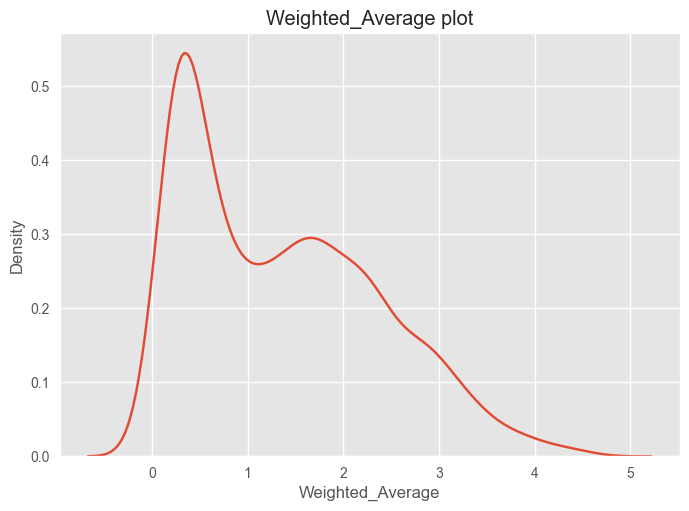

skew : 0.6082114167715136


In [259]:
plt.title('Weighted_Average plot')
sns.kdeplot(x = X['Weighted_Average'])
plt.show()
skew = X['Weighted_Average'].skew()
print(f'skew : {skew}')

In [260]:
X['Weighted_Average'].describe()

count    1885.000000
mean        1.369242
std         1.010092
min         0.000000
25%         0.428571
50%         1.224490
75%         2.102041
max         4.551020
Name: Weighted_Average, dtype: float64

In [261]:
X['Weighted_Average'] = np.log1p(X['Weighted_Average'])

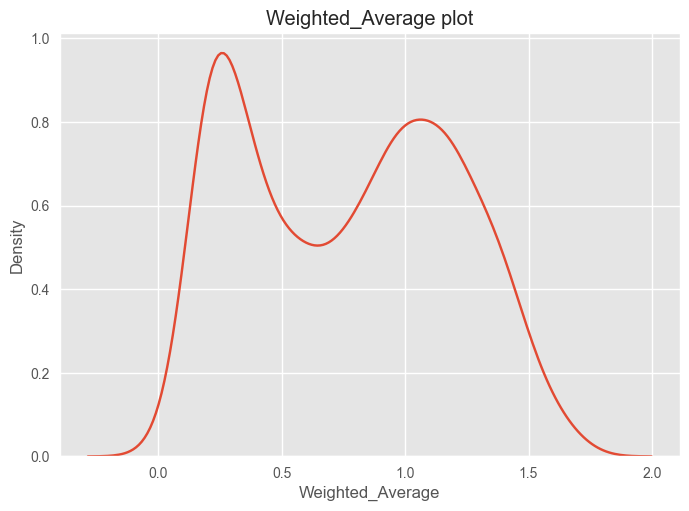

In [262]:
plt.title('Weighted_Average plot')
sns.kdeplot(x = X['Weighted_Average'])
plt.show()

- feature와 target의 관계 확인하기

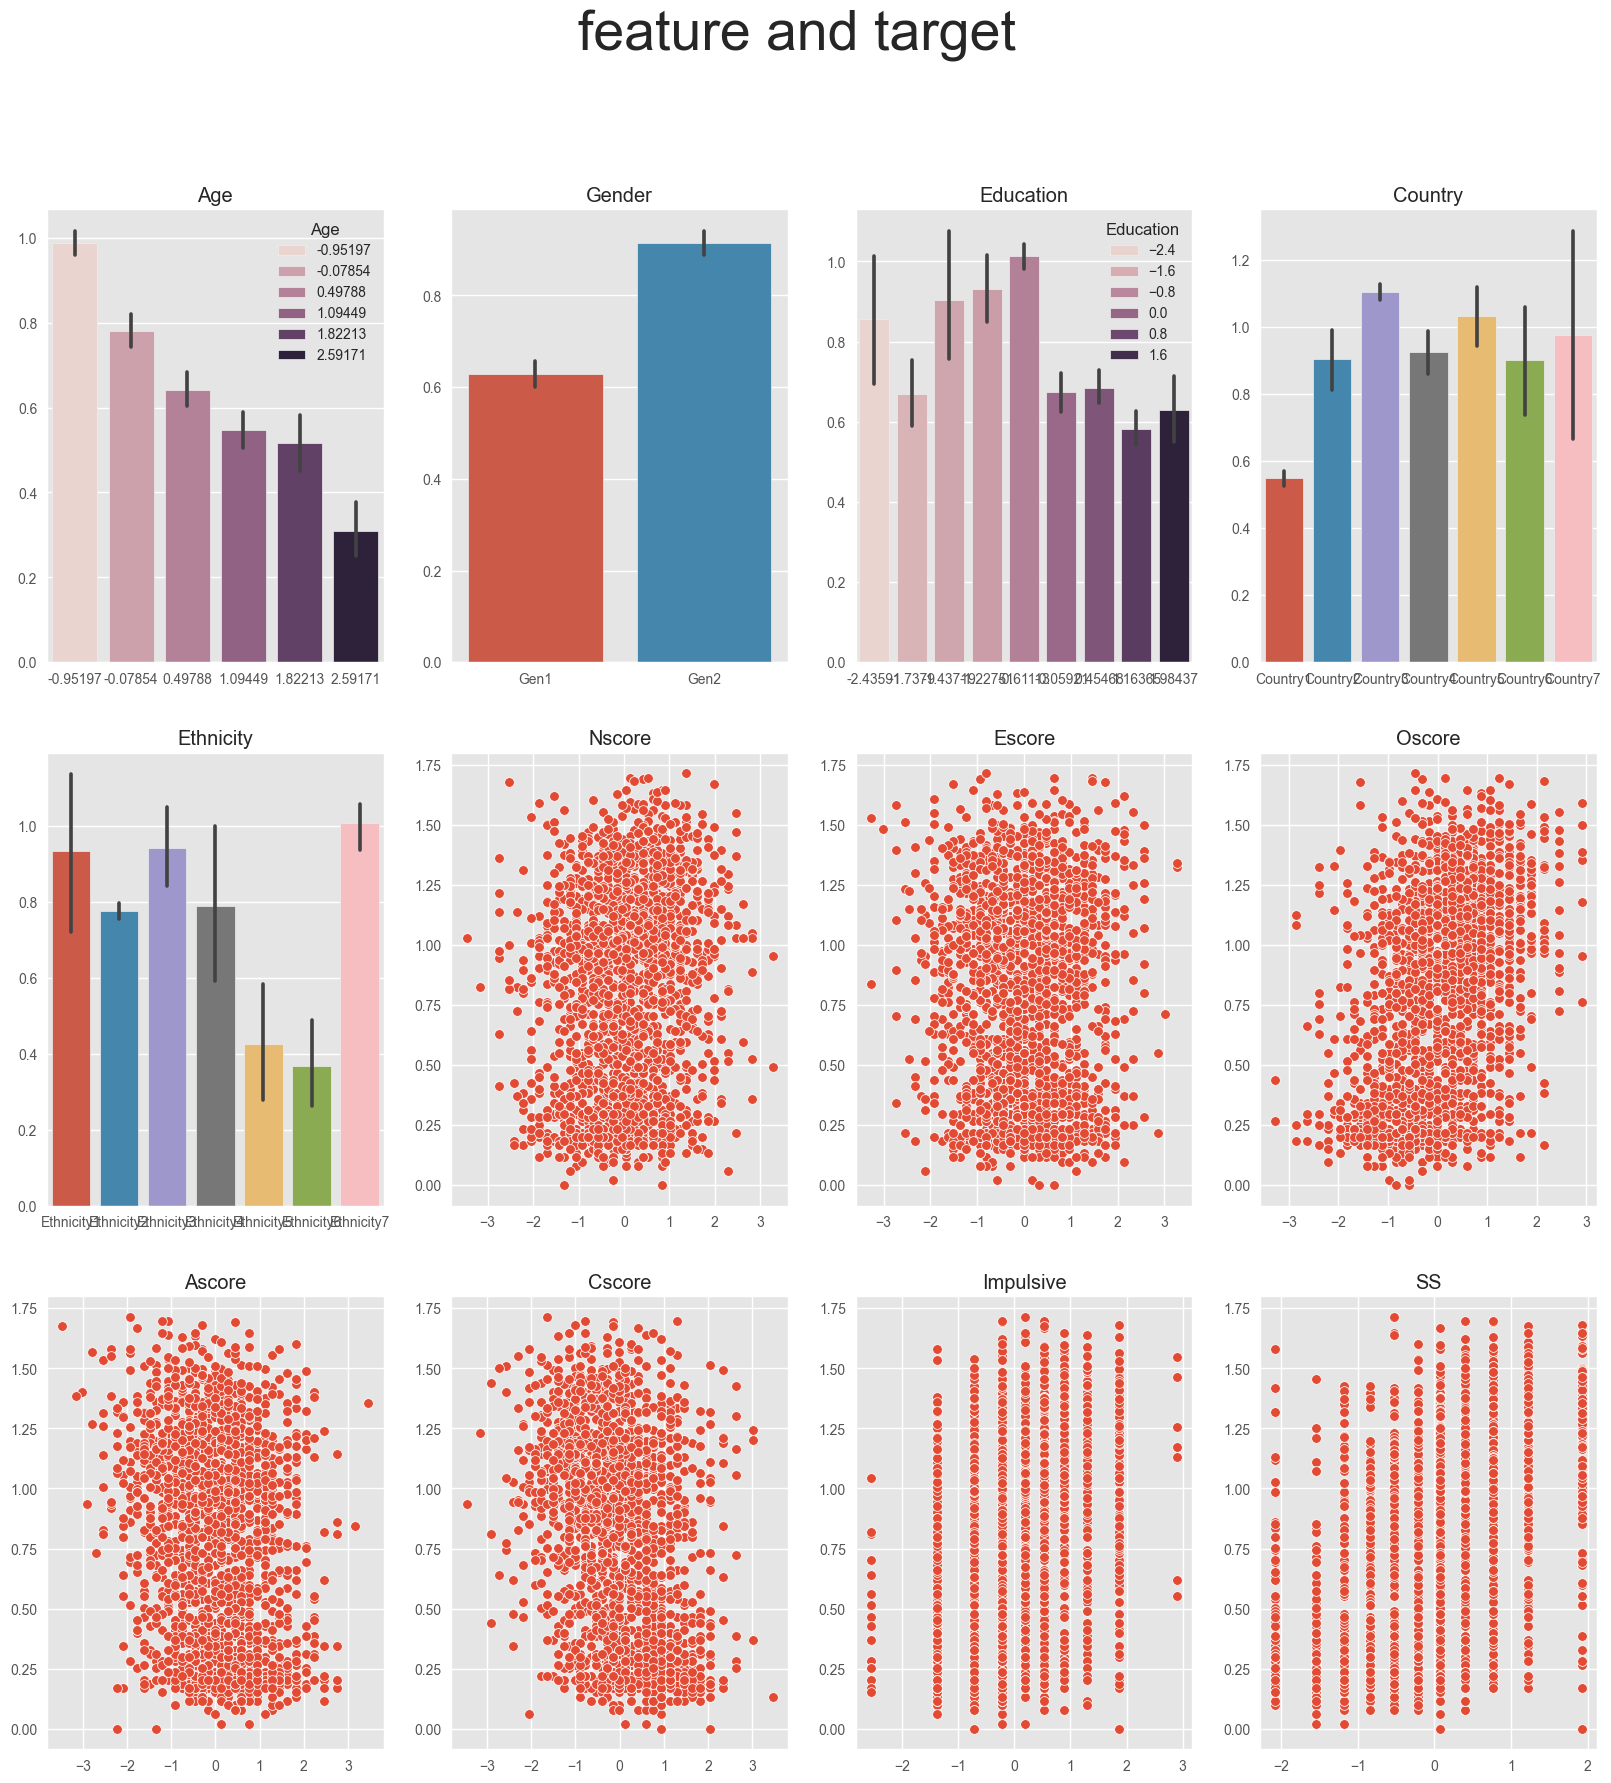

In [263]:
# 데이터프레임 df, 타겟 변수 target_name을 가정합니다.
target_name = 'Weighted_Average'
features = X.columns.drop(target_name)  # 타겟 변수를 제외한 모든 feature

fig, axs = plt.subplots(3, 4, figsize=(20,20))
plt.suptitle('feature and target', fontsize= 40)

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    if X[feature].nunique() < 10:  # 범주형 변수
        sns.barplot(x=feature, y=target_name, data=X, ax=axs[row, col], hue=feature)
    else:  # 연속형 변수
        sns.scatterplot(x=feature, y=target_name, data=X, ax=axs[row, col])
    axs[row, col].set_title(f'{feature}')
    axs[row, col].set_ylabel('')
    axs[row, col].set_xlabel('')


# 3. 회귀 모델 생성
pycaret을 이용해 상위 모델을 확인

In [264]:
from pycaret.regression import *

In [265]:
rgf1 = setup(data = X.iloc[:,:-1], target = X.iloc[:,-1], train_size = 0.7, session_id=42, fold_strategy = 'kfold', fold = 5, n_jobs = 8,
            categorical_features = ['Gender', 'Country', 'Ethnicity'])

,Description,Value
0,Session id,42
1,Target,Weighted_Average
2,Target type,Regression
3,Original data shape,"(1885, 13)"
4,Transformed data shape,"(1885, 25)"
5,Transformed train set shape,"(1319, 25)"
6,Transformed test set shape,"(566, 25)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,3


In [266]:
compare_models(fold = 5, sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.2304,0.0839,0.2895,0.5406,0.1685,0.5188,0.0180
ridge,Ridge Regression,0.2307,0.0841,0.2900,0.5391,0.1686,0.5161,0.0200
gbr,Gradient Boosting Regressor,0.2281,0.0843,0.2902,0.5382,0.1690,0.5059,0.0420
lr,Linear Regression,0.2309,0.0844,0.2903,0.5379,0.1688,0.5161,0.0180
rf,Random Forest Regressor,0.2291,0.0849,0.2913,0.5351,0.1706,0.5232,0.0860
huber,Huber Regressor,0.2295,0.0855,0.2922,0.5316,0.1690,0.4969,0.0180
et,Extra Trees Regressor,0.2338,0.0895,0.2991,0.5098,0.1740,0.5195,0.0660
lightgbm,Light Gradient Boosting Machine,0.2380,0.0930,0.3049,0.4907,0.1780,0.5229,0.0600
knn,K Neighbors Regressor,0.2402,0.0969,0.3111,0.4691,0.1806,0.5079,0.0240
ada,AdaBoost Regressor,0.2653,0.0976,0.3124,0.4653,0.1872,0.6862,0.0340


BayesianRidge()

- 솔직히 접근법이 별로라 결과도 좋게 나오진 않았다. best R2 : 0.5441

# 4. 결론

아직 정확히 모델을 parameter search를 통해 조정해보지는 않았지만, 여기까지 본다면 우선 target을 어떻게 선정하느냐가 가장 급선무 인 것 같다.

그나마 분포가 고르게 나왔던 Cannabis만을 가지고 예측할 수도 있을 것.

경험상 한번 도전해보았는데, 아직 멀고도 험한 길 같다.

+ 변수 중요도 확인하는게 중요 요인이고, 시간이 난다면 추가적인 방안으로 접근해보아야 함.